[  170.1092632    154.40536628   310.85385292   326.1497273    363.83214357
   953.33317061  1030.73685439   613.99029632   185.70538469   357.75268109
   680.49909418   885.54345527   927.68152886  1121.72362893]
14 14


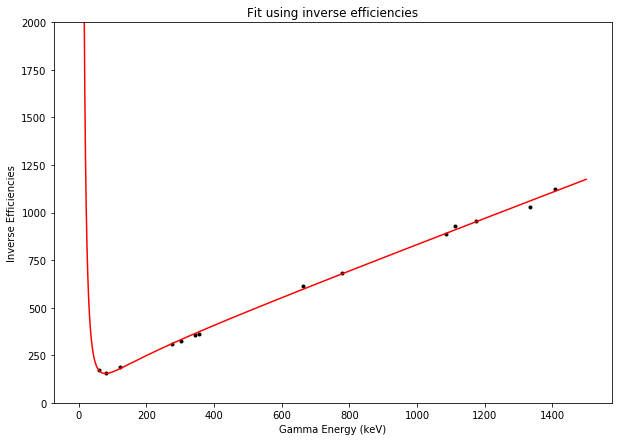

a:  0.676986315615 +/- 0.00126680859353
b:  168.916494793 +/- 1.68322501568
c:  -15106.4174415 +/- 416.742368694
d:  765419.054388 +/- 21267.1953501
The Chi2 Per DOF is:  2.6168695494


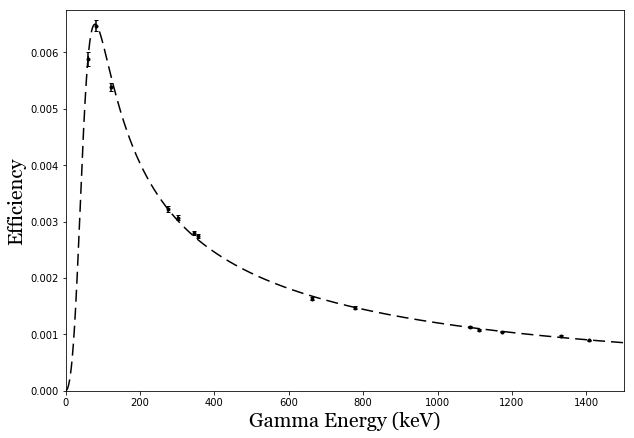

In [22]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import chisquare

energies = [59.5409,80.9979,276.3989,302.8508,356.0129,1173.228,1332.492,661.657,121.7817,344.2785,778.9045,964.057,1085.837,1112.076,1408.013]
energies = [59.5409,80.9979,276.3989,302.8508,356.0129,1173.228,1332.492,661.657,121.7817,344.2785,778.9045,1085.837,1112.076,1408.013]
#eff = [0.005830781347,0.006197327933,0.00321606518,0.003065237125,0.00274776781,0.001048332378,0.0009696073496,0.00162597122,0.00538359653,0.002794564282,0.001469161198,0.001182365208,0.001077700519,0.0008912737851]
#eff = [0.005830781347,0.00647,0.00321606518,0.003065237125,0.00274776781,0.001048332378,0.0009696073496,0.00162597122,0.00538359653,0.002794564282,0.001469161198,0.001182365208,0.001077700519,0.0008912737851]
#eff=np.array([0.005878574636,0.006476458844,0.003216945811,0.003066076456,0.002748520211,0.001048951228,0.000970179727,0.001628690235,0.005384873474,0.00279522713,0.001469509671,0.001182645656,0.00112925006,0.00107795614,0.0008914851878])
eff=np.array([0.005878574636,0.006476458844,0.003216945811,0.003066076456,0.002748520211,0.001048951228,0.000970179727,0.001628690235,0.005384873474,0.00279522713,0.001469509671,0.00112925006,0.00107795614,0.0008914851878])

E = np.linspace(1, 1500, 10000)
eff2 = []
for num in E:
    neweff = num**2/((.7115)*num**3 + (147.8817)*num**2 - (1169.8)*num + 63775.0)
    eff2.append(neweff)
    

#inv = [171.5036014, 161.3598652, 310.9389717, 326.2390344, 363.931769, 953.8959409, 1031.345318, 615.0170358, 185.7494324, 357.8375371, 680.6605029, 845.7623692, 927.9015671, 1121.989692]
#inv = [171.5036014, 154.55950541, 310.9389717, 326.2390344, 363.931769, 953.8959409, 1031.345318, 615.0170358, 185.7494324, 357.8375371, 680.6605029, 845.7623692, 927.9015671, 1121.989692]
inv = 1./eff
print inv
print len (eff), len(inv)
plt.plot(energies, inv, 'k.')
plt.title('Fit using inverse efficiencies')
plt.ylabel('Inverse Efficiencies')
plt.xlabel('Gamma Energy (keV)')


def fun(x, a, b, c, d):
    num = (a*x + b + c/x + d/x**2)
    return num

guess = np.array([0.7115, 147.9, -11700, 637800])
popt, pcov = curve_fit(fun, energies, inv, guess, absolute_sigma=True)



plt.plot(E, fun(E, *popt), 'r-')
plt.ylim(0, 2000)
plt.show()
perr = np.sqrt(np.diag(pcov))

print "a: ", popt[0], '+/-', perr[0]
print "b: ", popt[1], '+/-', perr[1]
print "c: ", popt[2], '+/-', perr[2]
print "d: ", popt[3], '+/-', perr[3]

#unc = [0.00008879375493, 0.0000607017901, 0.00004136889054, 0.00002972905806, 0.00001335456887, 0.00001050533244, 0.00001001327915, 0.00001633548788, 0.00003595994383, 0.00002539982847, 0.00001803657745, 0.0000145380804, 0.00001442853152, 0.000009978963663]
unc = [0.000122544298,0.00009427635104,0.0000540685208,0.00004454718515,0.0000325961193,0.00001609104402,0.0000150783891,0.00002493252907,0.00006919784223,0.00003983831049,0.00002420172745,0.00001949402548,0.00002382149785,0.00001866334886,0.00001397881325]
unc = [0.000122544298,0.00009427635104,0.0000540685208,0.00004454718515,0.0000325961193,0.00001609104402,0.0000150783891,0.00002493252907,0.00006919784223,0.00003983831049,0.00002420172745,0.00002382149785,0.00001866334886,0.00001397881325]

plt.plot(energies, eff, 'k.')
plt.plot(E, 1./fun(E, *popt), 'k-', dashes=[8, 4, 8, 4], label='New fit')
plt.errorbar(energies, eff, yerr = unc, fmt = 'k', capsize = 2.0, ls = 'none')
#plt.plot(E, 1./fun(E, 0.7115, 147.8817, -1169.8, 63775), 'r-', label='Old fit')
#plt.plot(E, 1./fun(E, 0.7115, 147.9, -11700, 637800), 'm-')
matplotlib.rcParams['figure.figsize'] = [10, 7]
plt.xlabel('Gamma Energy (keV)', fontsize=20, fontname='Georgia')
plt.ylabel('Efficiency', fontsize=20, fontname='Georgia')
plt.ylim(0, 0.00675)
plt.xlim(0, 1500)
#plt.legend()


predicted = []
for num in energies:
    newnum = 1./fun(num, *popt)
    predicted.append(newnum)
    
chi2 = []
i=0
while i<len(energies):
    diff = eff[i] - predicted[i]
    diff2 = diff**2
    variance = unc[i]**2
    chi2.append(diff2/variance)
    i+=1

DOF = len(eff) - 4.0
print 'The Chi2 Per DOF is: ', sum(chi2)/DOF

def efferr(en):
    a = popt[0]
    b = popt[1]
    c = popt[2]
    d = popt[3]
    sig_a = perr[0]
    sig_b = perr[1]
    sig_c = perr[2]
    sig_d = perr[3]
    neweff = 1.0/fun(en, a, b, c, d)
    sig_eff = neweff**2 * np.sqrt((en*sig_a)**2 + (sig_b)**2 + (sig_c/en)**2 + (sig_d/en**2)**2)
    return sig_eff

#plt.fill_between(E, 1./fun(E, *popt)+efferr(E), 1./fun(E, *popt)-efferr(E), facecolor='red', alpha=0.5)
plt.show()

In [7]:
print '843.76   ', efferr(843.76)
print '1368.63  ', efferr(1368.63)
print '355.7    ', efferr(355.7)
print '147.81   ', efferr(147.81)
print '411.8    ', efferr(411.8)
print '336.241  ', efferr(336.241)
print '1293.56  ', efferr(1293.56)
print '1377.63  ', efferr(1377.63)
print '810.76   ', efferr(810.76)
print '909.15   ', efferr(909.15)
print '1014.52  ', efferr(1014.52)
print '147.81   ', efferr(147.81)
print '188.27   ', efferr(188.27)
print '2754.007 ', efferr(2754.007)
print '333.03   ', efferr(333.03)
print '416.9    ', efferr(416.9)
print '818.68   ', efferr(818.68)
print '1097.28  ', efferr(1097.28)
print '127.164  ', efferr(127.164)
print '1919.52  ', efferr(1919.52)

843.76    3.85307029554e-06
1368.63   2.04008835464e-06
355.7     1.47738378488e-05
147.81    8.29211237789e-05
411.8     1.15247486175e-05
336.241   1.62971030411e-05
1293.56   2.18745871283e-06
1377.63   2.02377436277e-06
810.76    4.07583607499e-06
909.15    3.47367533378e-06
1014.52   2.99375721508e-06
147.81    8.29211237789e-05
188.27    4.95850794747e-05
2754.007  9.34638118143e-07
333.03    1.6574795991e-05
416.9     1.12916486509e-05
818.68    4.02019182709e-06
1097.28   2.69900546083e-06
127.164   0.000114604277822
1919.52   1.37425142685e-06


In [4]:
print np.asarray(unc)/np.asarray(eff)

[ 0.01522845  0.00979483  0.0128632   0.00969878  0.00486015  0.01002099
  0.01032715  0.0100466   0.00667954  0.00908901  0.01227679  0.01229576
  0.01338826  0.01119629]
